## Task-D: Collinear features and their effect on linear models

In [23]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
data = pd.read_csv('/content/drive/MyDrive/8_LinearModels/task_d.csv')

In [8]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [9]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

# Task 1

1.1. Finding the Correlation between the features

a. check the correlation between the features

b. plot heat map of correlation matrix using seaborn heatmap

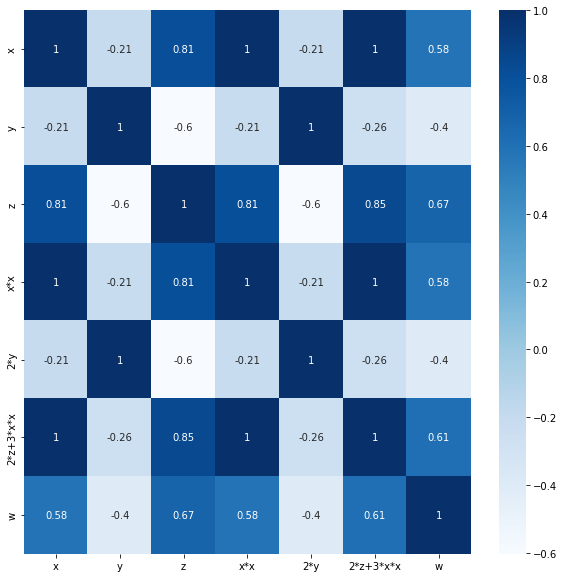

In [17]:
plt.figure(figsize = (10,10))
sns.heatmap(data.drop(['target'], axis=1).corr(),annot=True,cmap='Blues')

* Here we can see that features are highly correlated

2. Finding the best model for the given data

    a. Train Logistic regression on data(X,Y) that we have created in the above cell

    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or random search CV make sure you choose the alpha in log space)
  
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'

In [21]:
parameters = {'alpha' : np.logspace(0.000001,50.0,50)}
classif = SGDClassifier(loss = 'log')
gridsearch = GridSearchCV(classif, parameters, scoring='accuracy', cv = 10)
gridsearch.fit(X,Y)
gridsearch.best_estimator_

SGDClassifier(alpha=1.000002302587744, loss='log')

In [36]:
best_model = SGDClassifier(alpha=1.000002302587744, loss='log',random_state = 42)

3. Getting the weights with the original data

    a. train the 'best_model' with X, Y

    b. Check the accuracy of the model 'best_model_accuracy'
    
    c. Get the weights W using best_model.coef_

In [37]:
best_model.fit(X,Y)
best_model_accuracy = accuracy_score(Y,best_model.predict(X))*100
print('Accuracy of model in percentage : ', best_model_accuracy)
W = best_model.coef_
print("Model Weights : ",W)



Accuracy of model in percentage :  100.0
Model Weights :  [[ 0.17371161 -0.18779208  0.26174889  0.17005977 -0.18779208  0.18465688
   0.15252983]]


4. Modifying original data

    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)

    b. Train the same 'best_model' with data (X', Y)

    c. Check the accuracy of the model 'best_model_accuracy_edited'
    
    d. Get the weights W' using best_model.coef_

In [39]:
X_dash = X + 0.01
best_model.fit(X_dash,Y)
best_model_accuracy_edited = accuracy_score(Y,best_model.predict(X_dash))*100
print('Accuracy of model in percentage : ', best_model_accuracy_edited)
W_dash = best_model.coef_
print("Model Weights : ",W_dash)

Accuracy of model in percentage :  100.0
Model Weights :  [[ 0.17343279 -0.18831737  0.26137064  0.16977841 -0.18831737  0.18437032
   0.15212258]]


5.  Checking deviations in metric and weights 

    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'

    b. find the absolute change between each value of W and W' ==> |(W-W')|
    
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

In [74]:
type(W)
W.ravel()

array([ 0.17371161, -0.18779208,  0.26174889,  0.17005977, -0.18779208,
        0.18465688,  0.15252983])

difference between 'best_model_accuracy_edited' and 'best_model_accuracy :  0.0
obs_change :  [0.00027883 0.00052528 0.00037825 0.00028136 0.00052528 0.00028656
 0.00040725]
y : 0.2797155478137562
2*y : 0.2797155478137562
w : 0.26699551707024016
x*x : 0.16544689719816466


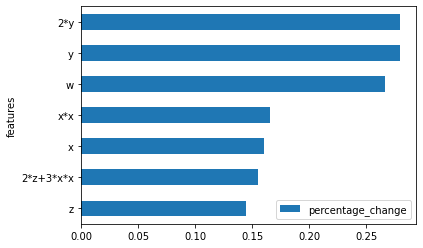

In [98]:
diff = best_model_accuracy_edited - best_model_accuracy
obs_change = np.abs(np.array(W).ravel() - np.array(W_dash).ravel())
print("difference between 'best_model_accuracy_edited' and 'best_model_accuracy : ",diff)
print("obs_change : ",obs_change)
percentage_change = np.abs((np.array(W).ravel() - np.array(W_dash).ravel())/np.array(W.ravel()))*100
dataframe = pd.DataFrame(data = list(zip(list(data.drop(['target'], axis=1).columns),list(percentage_change.ravel()))) , columns = ['features', 'percentage_change'])
dataframe.sort_values(by = 'percentage_change', ascending = True).plot.barh(x='features', y='percentage_change')
k = 1
for i in dataframe.sort_values(by = 'percentage_change', ascending = False).values:
  print('{0} : {1}'.format(i[0],i[1]))
  if k == 4:
    break
  k+=1


# Task: 2 Linear SVM

1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.

In [100]:
parameters = {'alpha' : np.logspace(0.000001,50.0,50)}
classif = SGDClassifier(loss = 'hinge')
gridsearch = GridSearchCV(classif, parameters, scoring='accuracy', cv = 10)
gridsearch.fit(X,Y)
gridsearch.best_estimator_

SGDClassifier(alpha=1.000002302587744)

In [102]:
best_model = SGDClassifier(alpha=1.000002302587744, loss='hinge',random_state = 42)

In [103]:
best_model.fit(X,Y)
best_model_accuracy = accuracy_score(Y,best_model.predict(X))*100
print('Accuracy of model in percentage : ', best_model_accuracy)
W = best_model.coef_
print("Model Weights : ",W)

Accuracy of model in percentage :  100.0
Model Weights :  [[ 0.16444776 -0.2241435   0.35401937  0.15620738 -0.2241435   0.18332961
   0.13374373]]


In [104]:
X_dash = X + 0.01
best_model.fit(X_dash,Y)
best_model_accuracy_edited = accuracy_score(Y,best_model.predict(X_dash))*100
print('Accuracy of model in percentage : ', best_model_accuracy_edited)
W_dash = best_model.coef_
print("Model Weights : ",W_dash)

Accuracy of model in percentage :  100.0
Model Weights :  [[ 0.16561569 -0.22380392  0.35639507  0.15745783 -0.22380392  0.18475341
   0.13387945]]


difference between 'best_model_accuracy_edited' and 'best_model_accuracy :  0.0
obs_change :  [0.00116793 0.00033958 0.0023757  0.00125045 0.00033958 0.0014238
 0.00013572]
x*x : 0.8005088440273426
2*z+3*x*x : 0.7766337909991905
x : 0.7102126598379818
z : 0.6710657547424512


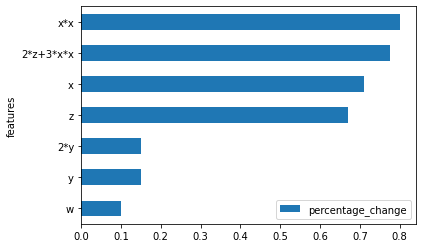

In [105]:
diff = best_model_accuracy_edited - best_model_accuracy
obs_change = np.abs(np.array(W).ravel() - np.array(W_dash).ravel())
print("difference between 'best_model_accuracy_edited' and 'best_model_accuracy : ",diff)
print("obs_change : ",obs_change)
percentage_change = np.abs((np.array(W).ravel() - np.array(W_dash).ravel())/np.array(W.ravel()))*100
dataframe = pd.DataFrame(data = list(zip(list(data.drop(['target'], axis=1).columns),list(percentage_change.ravel()))) , columns = ['features', 'percentage_change'])
dataframe.sort_values(by = 'percentage_change', ascending = True).plot.barh(x='features', y='percentage_change')
k = 1
for i in dataframe.sort_values(by = 'percentage_change', ascending = False).values:
  print('{0} : {1}'.format(i[0],i[1]))
  if k == 4:
    break
  k+=1

# Observations:
* Collinearity in the data is effecting Support Vector Classification more than the logistic regression
* Hence percentages are more when compared to logistic regression